# Summary

This is where we find structural templates for our training set, at different sequence identity cutoffs.

max_seq_identity | function
-----------------|--------------
100              | > 80
80               | > 60 & <= 80
60               | > 40 & <= 60
40               | <= 40

We create the `elaspic_training` database and fill it with training data.

We do this for the following training sets only:

  - protherm
  - taipale

----

# Imports

In [1]:
%run imports.ipynb

elaspic_training_set
2016-06-09 22:37:56.237604


In [2]:
NOTEBOOK_NAME = 'core_database'

In [3]:
os.makedirs(NOTEBOOK_NAME, exist_ok=True)

# Load data

In [4]:
with open(op.join('load_data', 'TRAINING_SETS.pkl'), 'rb') as ifh:
    TRAINING_SETS = pickle.load(ifh)
print(TRAINING_SETS.keys())

dict_keys(['protherm', 'humsavar', 'taipale'])


In [5]:
db = datapkg.DataFrameToMySQL(CONNECTION_STR, NOTEBOOK_NAME, STG_SERVER_IP, echo=False)

In [6]:
TRAINING_SETS.keys()

dict_keys(['protherm', 'humsavar', 'taipale'])

In [7]:
TRAINING_SETS['protherm'].head()

,uniprot_id,uniprot_mutation,ddg_exp,del_score_exp,del_class_exp,uniprot_sequence,uniprot_domain_id,pfam_clan,alignment_identity,alignment_coverage,alignment_score,norm_dope,matrix_score,secondary_structure_wt,solvent_accessibility_wt,secondary_structure_change,solvent_accessibility_change,provean_score,ddg,dg_wt,backbone_hbond_wt,sidechain_hbond_wt,van_der_waals_wt,electrostatics_wt,solvation_polar_wt,solvation_hydrophobic_wt,van_der_waals_clashes_wt,entropy_sidechain_wt,entropy_mainchain_wt,sloop_entropy_wt,mloop_entropy_wt,cis_bond_wt,torsional_clash_wt,backbone_clash_wt,helix_dipole_wt,water_bridge_wt,disulfide_wt,electrostatic_kon_wt,partial_covalent_bonds_wt,energy_ionisation_wt,entropy_complex_wt,number_of_residues,dg_change,backbone_hbond_change,sidechain_hbond_change,van_der_waals_change,electrostatics_change,solvation_polar_change,solvation_hydrophobic_change,van_der_waals_clashes_change,entropy_sidechain_change,entropy_mainchain_change,sloop_entropy_change,mloop_entropy_change,cis_bond_change,torsional_clash_change,backbone_clash_change,helix_dipole_change,water_bridge_change,disulfide_change,electrostatic_kon_change,partial_covalent_bonds_change,energy_ionisation_change,entropy_complex_change,pcv_salt_equal_wt,pcv_salt_equal_self_wt,pcv_salt_equal_change,pcv_salt_equal_self_change,pcv_salt_opposite_wt,pcv_salt_opposite_self_wt,pcv_salt_opposite_change,pcv_salt_opposite_self_change,pcv_hbond_wt,pcv_hbond_self_wt,pcv_hbond_change,pcv_hbond_self_change,pcv_vdw_wt,pcv_vdw_self_wt,pcv_vdw_change,pcv_vdw_self_change,dataset
0,P00648,Q151A,0.09,None,None,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,24447509,Ribonuclease,100.0,100.0,1.0,-1.33777,-1.0,6.0,67.1770,0,-18.0192,-2.160,0.829500,41.52,-55.36,-26.85,-120.88,-7.04,159.06,-158.13,23.57,63.15,151.88,0.0,0.0,0.0,13.70,63.13,-1.96,0.0,0.0,0.0,0.0,0.36,0.0,110.0,-0.58,-0.02,0.78,0.43,0.00,-0.80,0.47,-0.28,-0.85,-0.28,0.0,0.0,0.0,-0.01,-0.11,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,alascan_gpk
1,P00648,I156A,1.63,None,None,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,24447509,Ribonuclease,100.0,100.0,1.0,-1.33777,-2.0,0.0,13.6620,0,5.9086,-2.917,0.244914,41.46,-56.00,-27.66,-121.42,-6.92,159.87,-158.81,24.91,63.42,151.98,0.0,0.0,0.0,13.69,63.28,-1.96,0.0,0.0,0.0,0.0,0.36,0.0,110.0,-3.04,0.08,0.00,1.73,0.03,-1.25,3.03,-4.68,-1.21,-0.23,0.0,0.0,0.0,-0.55,-0.40,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,alascan_gpk
2,P00648,V57A,3.47,None,None,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,24447509,Ribonuclease,100.0,100.0,1.0,-1.33777,0.0,4.0,0.0000,0,0.0000,-3.993,0.602505,42.11,-55.95,-27.66,-121.16,-7.00,159.86,-158.30,24.97,63.32,151.97,0.0,0.0,0.0,13.66,63.31,-1.96,0.0,0.0,0.0,0.0,0.36,0.0,110.0,1.03,0.01,0.02,1.04,0.00,-0.37,2.09,-0.26,-0.47,-0.22,0.0,0.0,0.0,-0.81,-0.06,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,alascan_gpk
3,P00648,D59A,0.39,None,None,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,24447509,Ribonuclease,100.0,100.0,1.0,-1.33777,-2.0,4.0,52.7104,0,-4.6990,-4.217,1.360210,41.92,-56.37,-27.11,-121.18,-7.31,160.00,-158.13,24.97,63.01,152.13,0.0,0.0,0.0,13.58,63.11,-2.03,0.0,0.0,0.0,0.0,0.38,0.0,110.0,0.02,0.07,0.48,0.23,0.46,-0.73,0.09,0.00,-0.54,-0.24,0.0,0.0,0.0,-0.01,-0.18,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,alascan_gpk
4,P00648,Y60A,3,None,None,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,24447509,Ribonuclease,100.0,100.0,1.0,-1.33777,-2.0,4.0,35.8754,0,-23.5427,-8.450,0.438801,41.49,-55.89,-27.55,-120.34,-6.98,158.39,-157.41,24.98,62.78,151.48,0.0,0.0,0.0,13.64,63.13,-1.98,0.0,0.0,0.0,0.0,0.36,0.0,110.0,1.71,0.15,0.00,1.36,-0.03,-0.35,2.38,-0.02,-1.27,-0.50,0.0,0.0,0.0,-0.01,-0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,alascan_gpk


## all_mutations_ddg

In [8]:
all_mutations_ddg = pd.concat([
    TRAINING_SETS['protherm'],
    TRAINING_SETS['taipale'],
], ignore_index=True)

assert all_mutations_ddg.drop_duplicates().shape[0] == all_mutations_ddg.shape[0]

In [9]:
all_mutations_ddg.head()

,uniprot_id,uniprot_mutation,ddg_exp,del_score_exp,del_class_exp,uniprot_sequence,uniprot_domain_id,pfam_clan,alignment_identity,alignment_coverage,alignment_score,norm_dope,matrix_score,secondary_structure_wt,solvent_accessibility_wt,secondary_structure_change,solvent_accessibility_change,provean_score,ddg,dg_wt,backbone_hbond_wt,sidechain_hbond_wt,van_der_waals_wt,electrostatics_wt,solvation_polar_wt,solvation_hydrophobic_wt,van_der_waals_clashes_wt,entropy_sidechain_wt,entropy_mainchain_wt,sloop_entropy_wt,mloop_entropy_wt,cis_bond_wt,torsional_clash_wt,backbone_clash_wt,helix_dipole_wt,water_bridge_wt,disulfide_wt,electrostatic_kon_wt,partial_covalent_bonds_wt,energy_ionisation_wt,entropy_complex_wt,number_of_residues,dg_change,backbone_hbond_change,sidechain_hbond_change,van_der_waals_change,electrostatics_change,solvation_polar_change,solvation_hydrophobic_change,van_der_waals_clashes_change,entropy_sidechain_change,entropy_mainchain_change,sloop_entropy_change,mloop_entropy_change,cis_bond_change,torsional_clash_change,backbone_clash_change,helix_dipole_change,water_bridge_change,disulfide_change,electrostatic_kon_change,partial_covalent_bonds_change,energy_ionisation_change,entropy_complex_change,pcv_salt_equal_wt,pcv_salt_equal_self_wt,pcv_salt_equal_change,pcv_salt_equal_self_change,pcv_salt_opposite_wt,pcv_salt_opposite_self_wt,pcv_salt_opposite_change,pcv_salt_opposite_self_change,pcv_hbond_wt,pcv_hbond_self_wt,pcv_hbond_change,pcv_hbond_self_change,pcv_vdw_wt,pcv_vdw_self_wt,pcv_vdw_change,pcv_vdw_self_change,dataset
0,P00648,Q151A,0.09,None,None,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,24447509,Ribonuclease,100.0,100.0,1.0,-1.33777,-1.0,6.0,67.1770,0,-18.0192,-2.160,0.829500,41.52,-55.36,-26.85,-120.88,-7.04,159.06,-158.13,23.57,63.15,151.88,0.0,0.0,0.0,13.70,63.13,-1.96,0.0,0.0,0.0,0.0,0.36,0.0,110.0,-0.58,-0.02,0.78,0.43,0.00,-0.80,0.47,-0.28,-0.85,-0.28,0.0,0.0,0.0,-0.01,-0.11,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,alascan_gpk
1,P00648,I156A,1.63,None,None,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,24447509,Ribonuclease,100.0,100.0,1.0,-1.33777,-2.0,0.0,13.6620,0,5.9086,-2.917,0.244914,41.46,-56.00,-27.66,-121.42,-6.92,159.87,-158.81,24.91,63.42,151.98,0.0,0.0,0.0,13.69,63.28,-1.96,0.0,0.0,0.0,0.0,0.36,0.0,110.0,-3.04,0.08,0.00,1.73,0.03,-1.25,3.03,-4.68,-1.21,-0.23,0.0,0.0,0.0,-0.55,-0.40,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,alascan_gpk
2,P00648,V57A,3.47,None,None,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,24447509,Ribonuclease,100.0,100.0,1.0,-1.33777,0.0,4.0,0.0000,0,0.0000,-3.993,0.602505,42.11,-55.95,-27.66,-121.16,-7.00,159.86,-158.30,24.97,63.32,151.97,0.0,0.0,0.0,13.66,63.31,-1.96,0.0,0.0,0.0,0.0,0.36,0.0,110.0,1.03,0.01,0.02,1.04,0.00,-0.37,2.09,-0.26,-0.47,-0.22,0.0,0.0,0.0,-0.81,-0.06,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,alascan_gpk
3,P00648,D59A,0.39,None,None,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,24447509,Ribonuclease,100.0,100.0,1.0,-1.33777,-2.0,4.0,52.7104,0,-4.6990,-4.217,1.360210,41.92,-56.37,-27.11,-121.18,-7.31,160.00,-158.13,24.97,63.01,152.13,0.0,0.0,0.0,13.58,63.11,-2.03,0.0,0.0,0.0,0.0,0.38,0.0,110.0,0.02,0.07,0.48,0.23,0.46,-0.73,0.09,0.00,-0.54,-0.24,0.0,0.0,0.0,-0.01,-0.18,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,alascan_gpk
4,P00648,Y60A,3,None,None,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,24447509,Ribonuclease,100.0,100.0,1.0,-1.33777,-2.0,4.0,35.8754,0,-23.5427,-8.450,0.438801,41.49,-55.89,-27.55,-120.34,-6.98,158.39,-157.41,24.98,62.78,151.48,0.0,0.0,0.0,13.64,63.13,-1.98,0.0,0.0,0.0,0.0,0.36,0.0,110.0,1.71,0.15,0.00,1.36,-0.03,-0.35,2.38,-0.02,-1.27,-0.50,0.0,0.0,0.0,-0.01,-0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,alascan_gpk


## all_training_data

We can only get models of different sequence identities for $\Delta \Delta G$ predictor.

In [10]:
all_training_data = (
    all_mutations_ddg
    [['uniprot_id', 'uniprot_domain_id', 'uniprot_sequence']]
    .drop_duplicates()
)

In [11]:
display(all_training_data.head())
print(all_training_data.shape[0])

,uniprot_id,uniprot_domain_id,uniprot_sequence
0,P00648,24447509,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...
39,P0AEX9,76764849,MKIKTGARILALSALTTMMFSASALAKIEEGKLVIWINGDKGYNGL...
40,P48052,42174584,MAMRLILFFGALFGHIYCLETFVGDQVLEIVPSNEEQIKNLLQLEA...
49,P00257,73958266,MAARLLRVASAALGDTAGRWRLLARPRAGAGGLRGSRGPGLGGGAV...
50,P96110,52854031,MPEKSLYEMAVEQFNRAASLMDLESDLAEVLRRPKRVLIVEFPVRM...


1133


## all_training_data_2

Add domain and sequence info.

In [12]:
sql_query = """\
select *
from elaspic.uniprot_domain ud
join elaspic.uniprot_domain_template udm using (uniprot_domain_id)
join (select uniprot_id, uniprot_name from uniprot_kb.uniprot_sequence) us using (uniprot_id)
where uniprot_domain_id in ({});
""".format(", ".join(str(i) for i in set(all_training_data['uniprot_domain_id'])))

In [13]:
print(sql_query[:200], '...')

select *
from elaspic.uniprot_domain ud
join elaspic.uniprot_domain_template udm using (uniprot_domain_id)
join (select uniprot_id, uniprot_name from uniprot_kb.uniprot_sequence) us using (uniprot_id) ...


In [14]:
uniprot_sequence = pd.read_sql_query(sql_query, db.engine)

In [15]:
display(uniprot_sequence.head())
print(uniprot_sequence.shape)

,uniprot_id,uniprot_domain_id,pdbfam_name,pdbfam_idx,pfam_clan,alignment_def,pfam_names,alignment_subdefs,path_to_data,template_errors,cath_id,domain_start,domain_end,domain_def,alignment_identity,alignment_coverage,alignment_score,t_date_modified,uniprot_name
0,A6NJC3,1569578,UDPGT,1,GT-B,28:441,UDPGT,28:441,human/A6N/JC/A6NJC3/GT-B*28-441/,None,2o6lB00,270,444,270:444,56.77,37.2881,0.219745,2015-09-01 05:12:36,A6NJC3_HUMAN
1,A8K957,2071626,GST_N_3+GST_C_2,1,Thioredoxin+GST_C,28:282,"GST_N_3,GST_C_2","28:105,168:282",human/A8K/95/A8K957/Thioredoxin+GST_C*28-282/,None,4mf5A00,1,234,1:234,26.67,32.6772,0.099131,2015-09-01 05:12:36,A8K957_HUMAN
2,A8K8M0,2075383,Crisp,1,ShK-like,189:243,Crisp,189:243,human/A8K/8M/A8K8M0/ShK-like*189-243/,None,2a05A00,196,243,196:243,69.64,100.0000,0.711580,2015-09-01 05:12:36,A8K8M0_HUMAN
3,A8K2X8,2079353,Cpn60_TCP1,1,Cpn60_TCP1,44:537,Cpn60_TCP1,44:537,human/A8K/2X/A8K2X8/Cpn60_TCP1*44-537/,None,4b2tE00,1,541,1:541,97.04,100.0000,0.971880,2015-09-01 05:12:36,A8K2X8_HUMAN
4,B2R5P7,3286480,E1_dh,1,THDP-binding,66:362,E1_dh,66:362,human/B2R/5P/B2R5P7/THDP-binding*66-362/,None,3exeA00,28,390,28:390,99.72,100.0000,0.997340,2015-09-01 05:12:36,B2R5P7_HUMAN


(1133, 19)


In [16]:
all_training_data_2 = all_training_data.merge(uniprot_sequence)

In [17]:
all_training_data_2.head(2)

,uniprot_id,uniprot_domain_id,uniprot_sequence,pdbfam_name,pdbfam_idx,pfam_clan,alignment_def,pfam_names,alignment_subdefs,path_to_data,template_errors,cath_id,domain_start,domain_end,domain_def,alignment_identity,alignment_coverage,alignment_score,t_date_modified,uniprot_name
0,P00648,24447509,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,Ribonuclease,1,Ribonuclease,67:156,Ribonuclease,67:156,bacam/P00/64/P00648/Ribonuclease*67-156/,None,1b27A00,48,157,48:157,100.0,100.0,1.0,2015-09-01 05:12:36,RNBR_BACAM
1,P0AEX9,76764849,MKIKTGARILALSALTTMMFSASALAKIEEGKLVIWINGDKGYNGL...,SBP_bac_1,1,SBP_bac_1,45:315,SBP_bac_1|1,45:315,ecoli/P0A/EX/P0AEX9/SBP_bac_1.45-315/,None,2d21A00,27,396,27:396,100.0,100.0,1.0,2015-09-01 05:12:36,MALE_ECOLI


In [18]:
def get_domain_sequence(sequence, domain_def):
    domain_start, domain_end = [int(x) for x in domain_def.split(':')]
    domain_sequence = sequence[domain_start - 1:domain_end]
    return domain_sequence

assert get_domain_sequence('ABCDEFG', '1:3') == 'ABC'
assert get_domain_sequence('ABCDEFG', '1:7') == 'ABCDEFG'
assert get_domain_sequence('ABCDEFG', '4:7') == 'DEFG'

In [19]:
all_training_data_2['uniprot_domain_sequence'] = (
    all_training_data_2[['uniprot_sequence', 'domain_def']]
    .apply(lambda x: get_domain_sequence(*x), axis=1)
)

In [20]:
display(all_training_data_2.head())
print(all_training_data_2.shape[0])

,uniprot_id,uniprot_domain_id,uniprot_sequence,pdbfam_name,pdbfam_idx,pfam_clan,alignment_def,pfam_names,alignment_subdefs,path_to_data,template_errors,cath_id,domain_start,domain_end,domain_def,alignment_identity,alignment_coverage,alignment_score,t_date_modified,uniprot_name,uniprot_domain_sequence
0,P00648,24447509,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,Ribonuclease,1,Ribonuclease,67:156,Ribonuclease,67:156,bacam/P00/64/P00648/Ribonuclease*67-156/,None,1b27A00,48,157,48:157,100.00,100.0000,1.000000,2015-09-01 05:12:36,RNBR_BACAM,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...
1,P0AEX9,76764849,MKIKTGARILALSALTTMMFSASALAKIEEGKLVIWINGDKGYNGL...,SBP_bac_1,1,SBP_bac_1,45:315,SBP_bac_1|1,45:315,ecoli/P0A/EX/P0AEX9/SBP_bac_1.45-315/,None,2d21A00,27,396,27:396,100.00,100.0000,1.000000,2015-09-01 05:12:36,MALE_ECOLI,KIEEGKLVIWINGDKGYNGLAEVGKKFEKDTGIKVTVEHPDKLEEK...
2,P48052,42174584,MAMRLILFFGALFGHIYCLETFVGDQVLEIVPSNEEQIKNLLQLEA...,Propep_M14,1,Propep_M14,29:103,Propep_M14|1,29:103,human/P48/05/P48052/Propep_M14.29-103/,None,1ayeA00,19,117,19:117,100.00,100.0000,1.000000,2015-09-01 05:12:36,CBPA2_HUMAN,LETFVGDQVLEIVPSNEEQIKNLLQLEAQEHLQLDFWKSPTTPGET...
3,P00257,73958266,MAARLLRVASAALGDTAGRWRLLARPRAGAGGLRGSRGPGLGGGAV...,Fer2,1,Fer2,71:154,Fer2|1,71:154,None,None,1e6eB00,63,186,63:186,100.00,100.0000,1.000000,2015-09-01 05:12:36,ADX_BOVIN,DKITVHFINRDGETLTTKGKIGDSLLDVVVQNNLDIDGFGACEGTL...
4,P96110,52854031,MPEKSLYEMAVEQFNRAASLMDLESDLAEVLRRPKRVLIVEFPVRM...,ELFV_dehydrog_N+ELFV_dehydrog,1,ELFV_dehydrog_N+ELFV_dehydrog,34:413,"ELFV_dehydrog_N|1,ELFV_dehydrog|1","34:162,180:413",thema/P96/11/P96110/ELFV_dehydrog_N+ELFV_dehyd...,None,1b26A00,34,416,34:416,99.74,99.4723,0.992266,2015-09-01 05:12:36,DHE3_THEMA,PKRVLIVEFPVRMDDGHVEVFTGYRVQHNVARGPAKGGIRYHPDVT...


1133


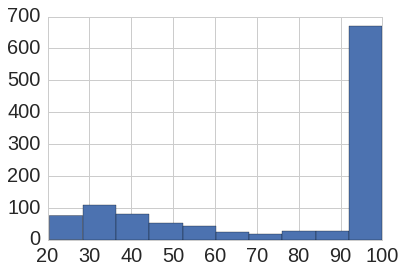

In [21]:
all_training_data_2['alignment_identity'].hist()

In [22]:
all_training_data_2_bak = all_training_data_2.copy()

## structural_templates

In [23]:
all_training_data_2 = all_training_data_2_bak.copy()

In [24]:
SHARED_COLUMNS = ['uniprot_id', 'uniprot_domain_id', 'uniprot_sequence', 'uniprot_domain_sequence']

In [25]:
import concurrent.futures

DATAPKG_DIR = op.dirname(op.dirname(op.dirname(op.abspath(NOTEBOOK_NAME))))
BLAST_DB = op.abspath(op.join(DATAPKG_DIR, 'profs', 'output', 'libraries_all_together_db', 'libraries_all'))
print(BLAST_DB)


def worker(x):
    i, row = x
    results_df = ascommon.sequence_tools.blastp(
        sequence=row['uniprot_domain_sequence'], db=BLAST_DB, evalue=0.001, max_target_seqs=100000)
    results_df = local.annotate_blast_results(
        results_df, 
        domain_start=int(row['domain_def'].split(':')[0]), 
        domain_sequence_length=len(row['uniprot_domain_sequence']))
    for column in SHARED_COLUMNS:
        results_df[column] = row[column]
    return results_df


structural_templates_file = op.join(NOTEBOOK_NAME, 'structural_templates.pkl')

if not op.isfile(structural_templates_file):
    with concurrent.futures.ProcessPoolExecutor() as p:
        results_df_all = p.map(worker, all_training_data_2.iterrows())
        structural_templates = pd.concat(results_df_all, ignore_index=True)
        structural_templates.to_pickle(structural_templates_file)
else:
    logger.info('Loading from file...')
    structural_templates = pd.read_pickle(structural_templates_file)

INFO:root:Loading from file...


/home/kimlab1/database_data/biodb/recipes/profs/output/libraries_all_together_db/libraries_all


In [26]:
_before = structural_templates.drop_duplicates(subset=['uniprot_id', 'uniprot_domain_id']).shape[0]
structural_templates = structural_templates.merge(all_training_data_2, on=SHARED_COLUMNS, suffixes=('', '_old'))
_after = structural_templates.drop_duplicates(subset=['uniprot_id', 'uniprot_domain_id']).shape[0]

assert _before == _after

In [27]:
display(structural_templates.head())
print(structural_templates.shape[0])
print(structural_templates.drop_duplicates(subset=['uniprot_id', 'uniprot_domain_id']).shape[0])

,alignment_coverage,alignment_identity,alignment_length,alignment_score,bitscore,domain_def_new,domain_end_new,domain_start_new,evalue,gap_opens,mismatches,pc_identity,pdb_cath_id,pdb_chain,pdb_domain_def,pdb_id,pdb_pdbfam_idx,pdb_pdbfam_name,pdb_pfam_clan,q_end,q_start,qseq,query_id,s_end,s_start,sseq,subject_id,t_date_modified,uniprot_domain_id,uniprot_domain_sequence,uniprot_id,uniprot_sequence,pdbfam_name,pdbfam_idx,pfam_clan,alignment_def,pfam_names,alignment_subdefs,path_to_data,template_errors,cath_id,domain_start,domain_end,domain_def,alignment_identity_old,alignment_coverage_old,alignment_score_old,t_date_modified_old,uniprot_name
0,100.000000,100.00,110.0,1.000000,228.0,48:157,157.0,48.0,2.000000e-77,0.0,0.0,100.00,1brsB00,B,1:110,1brs,1.0,Ribonuclease,Ribonuclease,110.0,1.0,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,unnamed,110.0,1.0,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,1brs_B|Ribonuclease|1|Ribonuclease|1:110|1brsB00,2016-06-08 13:07:48.088652,24447509,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,P00648,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,Ribonuclease,1,Ribonuclease,67:156,Ribonuclease,67:156,bacam/P00/64/P00648/Ribonuclease*67-156/,None,1b27A00,48,157,48:157,100.0,100.0,1.0,2015-09-01 05:12:36,RNBR_BACAM
1,99.090909,100.00,109.0,0.990909,226.0,49:157,157.0,49.0,1.000000e-76,0.0,0.0,100.00,1x1wC00,C,2:110,1x1w,1.0,Ribonuclease,Ribonuclease,110.0,2.0,QVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVAP...,unnamed,109.0,1.0,QVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVAP...,1x1w_C|Ribonuclease|1|Ribonuclease|2:110|1x1wC00,2016-06-08 13:07:48.088652,24447509,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,P00648,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,Ribonuclease,1,Ribonuclease,67:156,Ribonuclease,67:156,bacam/P00/64/P00648/Ribonuclease*67-156/,None,1b27A00,48,157,48:157,100.0,100.0,1.0,2015-09-01 05:12:36,RNBR_BACAM
2,100.000000,99.09,110.0,0.991355,226.0,48:157,157.0,48.0,1.000000e-76,0.0,1.0,99.09,1b2sA00,A,1:110,1b2s,1.0,Ribonuclease,Ribonuclease,110.0,1.0,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,unnamed,110.0,1.0,AQVINTFDGVADYLQTYHKLPDNYITASEAQALGWVASKGNLADVA...,1b2s_A|Ribonuclease|1|Ribonuclease|1:110|1b2sA00,2016-06-08 13:07:48.088652,24447509,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,P00648,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,Ribonuclease,1,Ribonuclease,67:156,Ribonuclease,67:156,bacam/P00/64/P00648/Ribonuclease*67-156/,None,1b27A00,48,157,48:157,100.0,100.0,1.0,2015-09-01 05:12:36,RNBR_BACAM
3,100.000000,99.09,110.0,0.991355,225.0,48:157,157.0,48.0,2.000000e-76,0.0,1.0,99.09,1x1yB00,B,1:110,1x1y,1.0,Ribonuclease,Ribonuclease,110.0,1.0,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,unnamed,110.0,1.0,AAVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,1x1y_B|Ribonuclease|1|Ribonuclease|1:110|1x1yB00,2016-06-08 13:07:48.088652,24447509,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,P00648,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,Ribonuclease,1,Ribonuclease,67:156,Ribonuclease,67:156,bacam/P00/64/P00648/Ribonuclease*67-156/,None,1b27A00,48,157,48:157,100.0,100.0,1.0,2015-09-01 05:12:36,RNBR_BACAM
4,99.090909,99.08,109.0,0.982249,225.0,49:157,157.0,49.0,3.000000e-76,0.0,1.0,99.08,1banC00,C,2:110,1ban,1.0,Ribonuclease,Ribonuclease,110.0,2.0,QVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVAP...,unnamed,109.0,1.0,QVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVAP...,1ban_C|Ribonuclease|1|Ribonuclease|2:110|1banC00,2016-06-08 13:07:48.088652,24447509,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,P00648,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,Ribonuclease,1,Ribonuclease,67:156,Ribonuclease,67:156,bacam/P00/64/P00648/Ribonuclease*67-156/,None,1b27A00,48,157,48:157,100.0,100.0,1.0,2015-09-01 05:12:36,RNBR_BACAM


191396
1104


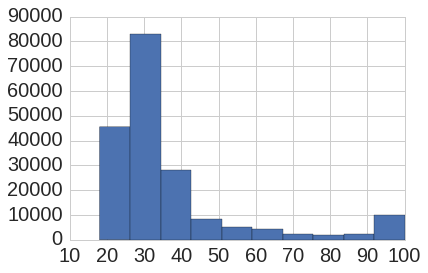

In [28]:
structural_templates['alignment_identity'].hist()

In [29]:
structural_templates_bak = structural_templates.copy()

# Find *structural templates*

In [30]:
structural_templates_2 = structural_templates_bak.copy()

In [31]:
def get_max_seq_identity(alignment_identity):
    assert (alignment_identity <= 100) & (alignment_identity > 1.0)
    if alignment_identity > 80:
        return 100
    elif alignment_identity > 60:
        return 80
    elif alignment_identity > 40:
        return 60
    return 40

assert get_max_seq_identity(90.63) == 100
assert get_max_seq_identity(81.54) == 100
assert get_max_seq_identity(71.2) == 80
assert get_max_seq_identity(59.3) == 60
assert get_max_seq_identity(11.1) == 40

In [32]:
structural_templates_2['max_seq_identity'] = (
    structural_templates_2['alignment_identity'].apply(get_max_seq_identity)
)

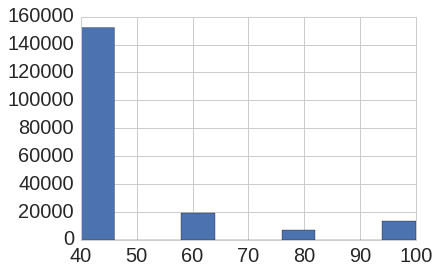

In [33]:
structural_templates_2['max_seq_identity'].hist()

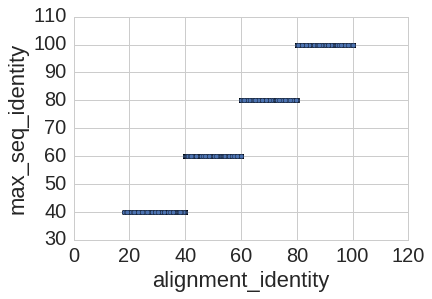

In [34]:
structural_templates_2.plot(kind='scatter', x='alignment_identity', y='max_seq_identity')

In [35]:
display(structural_templates_2.head())
print(structural_templates_2.shape)

,alignment_coverage,alignment_identity,alignment_length,alignment_score,bitscore,domain_def_new,domain_end_new,domain_start_new,evalue,gap_opens,mismatches,pc_identity,pdb_cath_id,pdb_chain,pdb_domain_def,pdb_id,pdb_pdbfam_idx,pdb_pdbfam_name,pdb_pfam_clan,q_end,q_start,qseq,query_id,s_end,s_start,sseq,subject_id,t_date_modified,uniprot_domain_id,uniprot_domain_sequence,uniprot_id,uniprot_sequence,pdbfam_name,pdbfam_idx,pfam_clan,alignment_def,pfam_names,alignment_subdefs,path_to_data,template_errors,cath_id,domain_start,domain_end,domain_def,alignment_identity_old,alignment_coverage_old,alignment_score_old,t_date_modified_old,uniprot_name,max_seq_identity
0,100.000000,100.00,110.0,1.000000,228.0,48:157,157.0,48.0,2.000000e-77,0.0,0.0,100.00,1brsB00,B,1:110,1brs,1.0,Ribonuclease,Ribonuclease,110.0,1.0,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,unnamed,110.0,1.0,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,1brs_B|Ribonuclease|1|Ribonuclease|1:110|1brsB00,2016-06-08 13:07:48.088652,24447509,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,P00648,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,Ribonuclease,1,Ribonuclease,67:156,Ribonuclease,67:156,bacam/P00/64/P00648/Ribonuclease*67-156/,None,1b27A00,48,157,48:157,100.0,100.0,1.0,2015-09-01 05:12:36,RNBR_BACAM,100
1,99.090909,100.00,109.0,0.990909,226.0,49:157,157.0,49.0,1.000000e-76,0.0,0.0,100.00,1x1wC00,C,2:110,1x1w,1.0,Ribonuclease,Ribonuclease,110.0,2.0,QVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVAP...,unnamed,109.0,1.0,QVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVAP...,1x1w_C|Ribonuclease|1|Ribonuclease|2:110|1x1wC00,2016-06-08 13:07:48.088652,24447509,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,P00648,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,Ribonuclease,1,Ribonuclease,67:156,Ribonuclease,67:156,bacam/P00/64/P00648/Ribonuclease*67-156/,None,1b27A00,48,157,48:157,100.0,100.0,1.0,2015-09-01 05:12:36,RNBR_BACAM,100
2,100.000000,99.09,110.0,0.991355,226.0,48:157,157.0,48.0,1.000000e-76,0.0,1.0,99.09,1b2sA00,A,1:110,1b2s,1.0,Ribonuclease,Ribonuclease,110.0,1.0,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,unnamed,110.0,1.0,AQVINTFDGVADYLQTYHKLPDNYITASEAQALGWVASKGNLADVA...,1b2s_A|Ribonuclease|1|Ribonuclease|1:110|1b2sA00,2016-06-08 13:07:48.088652,24447509,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,P00648,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,Ribonuclease,1,Ribonuclease,67:156,Ribonuclease,67:156,bacam/P00/64/P00648/Ribonuclease*67-156/,None,1b27A00,48,157,48:157,100.0,100.0,1.0,2015-09-01 05:12:36,RNBR_BACAM,100
3,100.000000,99.09,110.0,0.991355,225.0,48:157,157.0,48.0,2.000000e-76,0.0,1.0,99.09,1x1yB00,B,1:110,1x1y,1.0,Ribonuclease,Ribonuclease,110.0,1.0,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,unnamed,110.0,1.0,AAVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,1x1y_B|Ribonuclease|1|Ribonuclease|1:110|1x1yB00,2016-06-08 13:07:48.088652,24447509,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,P00648,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,Ribonuclease,1,Ribonuclease,67:156,Ribonuclease,67:156,bacam/P00/64/P00648/Ribonuclease*67-156/,None,1b27A00,48,157,48:157,100.0,100.0,1.0,2015-09-01 05:12:36,RNBR_BACAM,100
4,99.090909,99.08,109.0,0.982249,225.0,49:157,157.0,49.0,3.000000e-76,0.0,1.0,99.08,1banC00,C,2:110,1ban,1.0,Ribonuclease,Ribonuclease,110.0,2.0,QVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVAP...,unnamed,109.0,1.0,QVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVAP...,1ban_C|Ribonuclease|1|Ribonuclease|2:110|1banC00,2016-06-08 13:07:48.088652,24447509,AQVINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVA...,P00648,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,Ribonuclease,1,Ribonuclease,67:156,Ribonuclease,67:156,bacam/P00/64/P00648/Ribonuclease*67-156/,None,1b27A00,48,157,48:157,100.0,100.0,1.0,2015-09-01 05:12:36,RNBR_BACAM,100


(191396, 50)


In [36]:
structural_templates_2 = structural_templates_2.sort_values('alignment_score', ascending=False)
structural_templates_2 = structural_templates_2.drop_duplicates(subset=['uniprot_domain_id', 'max_seq_identity'])

In [37]:
print(all_training_data_2.shape)
print(structural_templates_2.shape)

(1133, 21)
(2814, 50)


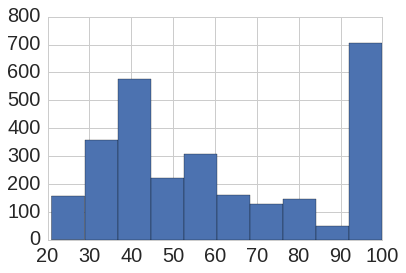

In [38]:
structural_templates_2['alignment_identity'].hist()

In [39]:
structural_templates_2_bak = structural_templates_2.copy()

# Save to database

In [40]:
structural_templates_3 = structural_templates_2.copy()

structural_templates_3['uniprot_domain_id_old'] = structural_templates_3['uniprot_domain_id']
structural_templates_3['uniprot_domain_id'] = range(structural_templates_3.shape[0])

### Set *path_to_data*

In [42]:
import elaspic.elaspic_database

def get_path_to_data(X):
    uniprot_name, uniprot_id, pfam_clan, alignment_def = X
    # This is same as always so that we can retreive Provean supsets
    prefix = elaspic.elaspic_database.get_uniprot_base_path(uniprot_name=uniprot_name, uniprot_id=uniprot_id)
    # Add '.training' suffix so this never gets confused with anything in real life
    suffix = elaspic.elaspic_database.get_uniprot_domain_path(pfam_clan=pfam_clan, alignment_def=alignment_def + '.training')
    return prefix + suffix

In [43]:
structural_templates_3['path_to_data'] = (
    structural_templates_3[['uniprot_name', 'uniprot_id', 'pfam_clan', 'alignment_def']]
    .apply(get_path_to_data, axis=1)
)

In [44]:
structural_templates_3['path_to_data'].head()

0         bacam/P00/64/P00648/Ribonuclease.67-156.training/
149521     human/O95/29/O95292/Motile_Sperm.8-110.training/
23511     human/P11/31/P11310/Acyl-CoA_dh_N+Acyl-CoA_dh_...
51945               human/P15/53/P15531/NDK.5-138.training/
51871         human/Q00/60/Q00604/Cys_knot.47-132.training/
Name: path_to_data, dtype: object

In [45]:
!mysql -u strokach -h 192.168.6.19 elaspic_training < ../scripts/create_database.sql

In [46]:
engine_et = sa.create_engine('mysql://strokach:@192.168.6.19/elaspic_training')

In [47]:
_uniprot_domain = pd.read_sql_query('select * from uniprot_domain limit 0', engine_et)
_uniprot_domain_template = pd.read_sql_query('select * from uniprot_domain_template limit 0', engine_et)
_uniprot_domain_model = pd.read_sql_query('select * from uniprot_domain_model limit 0', engine_et)
_uniprot_domain_mutation = pd.read_sql_query('select * from uniprot_domain_mutation limit 0', engine_et)

In [48]:
assert not set(_uniprot_domain.columns) - set(structural_templates_3.columns)

set()

In [49]:
assert not set(_uniprot_domain_template.columns) - set(structural_templates_3.columns)

set()

In [50]:
assert (structural_templates_3['uniprot_domain_id'].shape == 
        structural_templates_3['uniprot_domain_id'].drop_duplicates().shape)

In [51]:
structural_templates_3[_uniprot_domain.columns].to_sql(
    'uniprot_domain', engine_et, schema='elaspic_training', index=False, chunksize=1000, if_exists='append')

In [52]:
structural_templates_3[_uniprot_domain_template.columns].to_sql(
    'uniprot_domain_template', engine_et, schema='elaspic_training', index=False, chunksize=1000, if_exists='append')

# Run *elaspic* on training data

In [85]:
CONFIG_FILE_TRAINING = op.abspath('../scripts/config_file_training.ini')
CONFIG_FILE_TRAINING

'/home/kimlab1/database_data/biodb/recipes/elaspic_training_set/scripts/config_file_training.ini'

In [86]:
SYSTEM_COMMAND_TEMPLATE = (
    "elaspic run -u {{uniprot_id}} -m {{uniprot_mutation}} -c {config_file_training}"
    .format(config_file_training=CONFIG_FILE_TRAINING)
)
SYSTEM_COMMAND_TEMPLATE

'elaspic run -u {uniprot_id} -m {uniprot_mutation} -c /home/kimlab1/database_data/biodb/recipes/elaspic_training_set/scripts/config_file_training.ini'

In [87]:
df = (
    all_mutations_ddg
    [['uniprot_id', 'uniprot_mutation']]
    .drop_duplicates()
)
assert len(df.index) == len(set(df.index))
df.head()

,uniprot_id,uniprot_mutation
0,P00648,Q151A
1,P00648,I156A
2,P00648,V57A
3,P00648,D59A
4,P00648,Y60A


In [88]:
system_commands = list(zip(
    df.index,
    df.apply(lambda x: SYSTEM_COMMAND_TEMPLATE.format(**x), axis=1)
))

In [89]:
system_commands[:2]

[(0,
  'elaspic run -u P00648 -m Q151A -c /home/kimlab1/database_data/biodb/recipes/elaspic_training_set/scripts/config_file_training.ini'),
 (1,
  'elaspic run -u P00648 -m I156A -c /home/kimlab1/database_data/biodb/recipes/elaspic_training_set/scripts/config_file_training.ini')]

In [141]:
logging.getLogger().setLevel(logging.INFO)

In [142]:
reload(ascommon)
reload(ascommon.cluster_tools)
reload(ascommon.cluster_tools._jobsubmitter)

<module 'ascommon.cluster_tools._jobsubmitter' from '/home/kimlab1/strokach/working/ascommon/ascommon/cluster_tools/_jobsubmitter.py'>

In [143]:
# Run gridsearch on cluster
js = ascommon.cluster_tools.JobSubmitter(
    job_name='_elaspic_training', 
    # connection_string='pbs://:@192.168.233.150', 
    connection_string='sge://:@192.168.6.201', 
    log_root_path=op.abspath(NOTEBOOK_NAME),
    #
    email='ostrokach@gmail.com', force_new_folder=False,
    nproc=1, queue='medium', walltime='04:00:00', mem='10G', vmem='12G',
    concurrent_job_limit=800,
    env={'PATH': os.environ['PATH'], 'KEY_MODELLER': os.environ['KEY_MODELLER']}
)

In [151]:
# Get job status
results_df = js.job_status(system_commands)
print(Counter(results_df['status']))

Counter({'done': 5659, 'error': 35, 'running': 17})


In [152]:
# Job statistics
failed = (
    set(results_df[results_df['status'] != 'done']['job_id'])
)
system_commands_remaining = [x for x in system_commands if x[0] in failed]
print(len(system_commands_remaining))

52


In [153]:
with js.connect():
    js.submit(system_commands_remaining)

# Done

In [ ]:
!elaspic run -u P61981 -m E90G -c ../scripts/config_file.ini

In [ ]:
!elaspic run -u P00648 -m Q151A -c ../scripts/config_file_training.ini

In [ ]:
display(structural_templates_2.head())
print(structural_templates_2.shape)

In [ ]:
max_seq_identity_df = pd.DataFrame([40, 60, 80, 100], columns=['max_seq_identity'])
max_seq_identity_df['tmp'] = 1
max_seq_identity_df